## Charge the libraries

In [2]:
# Automatically reload modules
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Import standard Libraries
import os
import sys

# Import third-party Libraries
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np # Required for the alternative loading method
import matplotlib.pyplot as plt
import seaborn as sns


## Funtions to use in the code

In [24]:
def visualize_distribution(dataframe, columns):
    """
    Creates distribution visualizations for the specified columns.
    For each column, generates a 1x2 plot with histogram and boxplot.
    
    Parameters:
    - dataframe: Pandas DataFrame containing the data
    - columns: List of column names to visualize
    """
    # Configure seaborn style
    sns.set(style="whitegrid")
    
    # Iterate over each column and create its visualizations
    for column in columns:
        # Create figure with two subplots (1 rows, 2 column)
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Main title for the complete figure
        fig.suptitle(f'Distribution Analysis: {column}', fontsize=16)
        
        # Subplot 1: Histogram with density estimator
        sns.histplot(dataframe[column], bins=30, kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {column}')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frequency')
        
        # Subplot 2: Boxplot
        sns.boxplot(x=dataframe[column], ax=axes[1])
        axes[1].set_title(f'Boxplot of {column}')
        axes[1].set_xlabel(column)

        # Adjust layout and display
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)  # Leave space for the main title
        plt.show()


In [ ]:
def plot_correlation_with_target(dataframe, features_list, target_name, figsize=(12, 8)):
    """
    Creates a correlation heatmap showing relationships between selected features and a target variable.
    
    Parameters:
    - dataframe: Pandas DataFrame containing the data
    - features_list: List of feature column names to include in the correlation analysis
    - target_name: Name of the target variable column
    - figsize: Tuple specifying the figure size (width, height)
    """
    # Ensure target is included in the features to correlate
    columns_to_correlate = features_list.copy()
    if target_name not in columns_to_correlate:
        columns_to_correlate.append(target_name)
    
    # Select only the specified columns from the dataframe
    selected_df = dataframe[columns_to_correlate]
    
    # Calculate the correlation matrix
    correlation_matrix = selected_df.corr()
    
    # Create the figure
    plt.figure(figsize=figsize)
    
    # Generate the heatmap
    sns.heatmap(
        correlation_matrix, 
        annot=True,               # Show correlation values inside cells
        fmt=".2f",                # Format to 2 decimal places
        cmap='coolwarm',          # Color map (red = negative, blue = positive)
        square=True,              # Make cells square-shaped
        cbar_kws={"shrink": .8},  # Customize the color bar
        vmin=-1, vmax=1           # Set the min/max of the color scale to -1/1
    )
    
    # Add title and adjust layout
    plt.title(f'Correlation Matrix with Target: {target_name}', fontsize=14)
    plt.tight_layout()
    plt.show()


## Charge the dataset

In [25]:
# Attempt to load the Boston dataset
boston_data_available = False
boston_df = None

# Try loading from the original source URL as load_boston is removed from sklearn
try:
    print("Loading the Boston dataset")

    # URL for the Boston housing dataset
    data_url = "http://lib.stat.cmu.edu/datasets/boston"

    # Read the data using specific parsing logic for this file format
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

    # Data is interlaced, needs reshaping
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

    # Define feature names based on dataset description
    feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                        'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

    # Create Pandas DataFrame
    boston_df = pd.DataFrame(data, columns=feature_names)
    boston_df['MEDV'] = target # Target variable: Median value of owner-occupied homes in $1000s

    boston_data_available = True
    print("Successfully loaded Boston dataset.")

except Exception as e:
    print(f"Error loading Boston dataset: {e}")
    print("Cannot proceed without the dataset. Please check the URL or your internet connection.")
    print("Note: The Boston dataset has ethical concerns and is deprecated in scikit-learn.")

Loading the Boston dataset
Successfully loaded Boston dataset.


## Explore the data structure

In [ ]:
# Analyze the data only if was loaded successfully
try:
    if boston_data_available and boston_df is not None:

        # Explore Data Structure
        print("Data Exploration")
        print("===================================")
        print("\nFirst 5 rows of the dataset:")
        print(boston_df.head())

        # Provide information of the DataFrame
        print("\nDataset information (columns, data types, non-null counts):")
        print("===================================")
        boston_df.info()

        # Describe the statistical details (mean, std dev, min, max, quartiles) of the dataset
        print("\nStatistics for numerical columns:")
        print("===================================")
        print(boston_df.describe())

        # Check for missing values and counts missing values per column
        print("\nCheck for any missing values:")
        print("===================================")
        print(boston_df.isnull().sum()) # Counts missing values per column, this check strategy is a good practice.

        # Specifically look at the columns we'll use: MEDV, LSTAT, AGE
        print("\nExploring target (MEDV) and predictor (LSTAT, AGE) columns:")
        print("===================================")
        print(boston_df[['MEDV', 'LSTAT', 'AGE']].head())
        print(boston_df[['MEDV', 'LSTAT', 'AGE']].describe())

    else:
        print("\nAnalysis could not be performed as the Boston dataset failed to load.")

except Exception as e:
    print(f"Error during analysis: {e}")
    print("Please check the dataset and try again.")

Data Exploration

First 5 rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Dataset information (columns, data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    

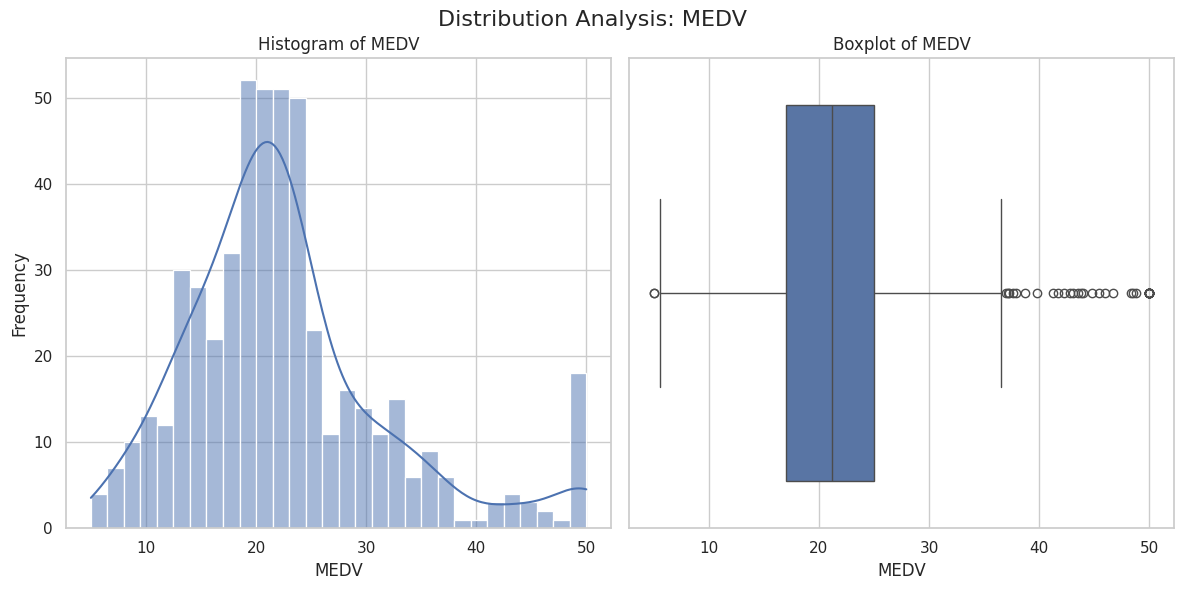

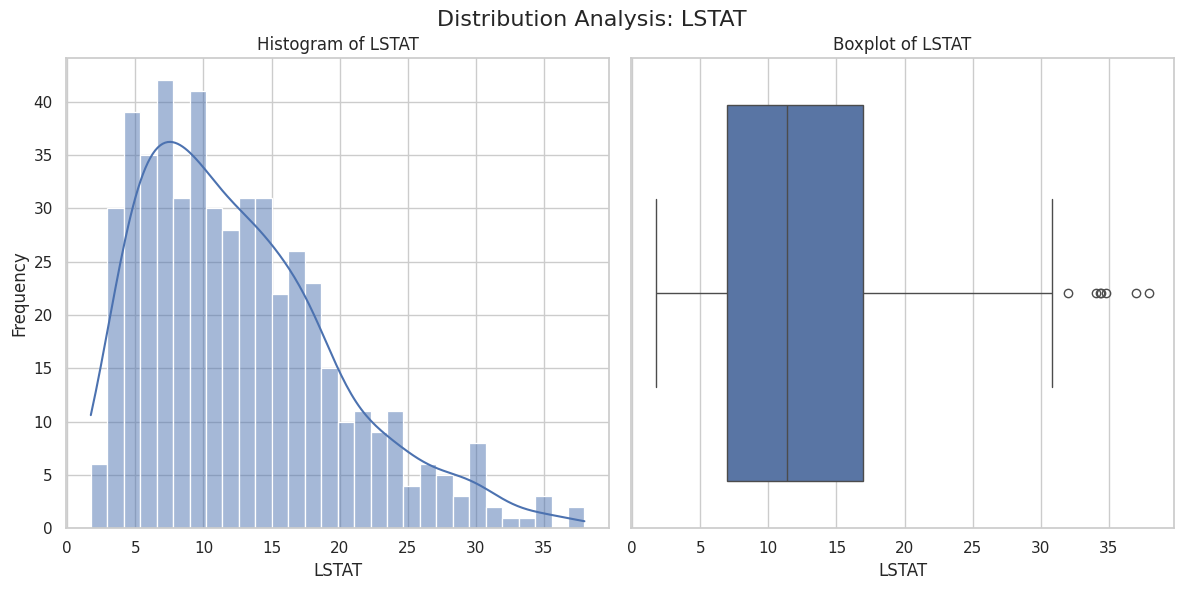

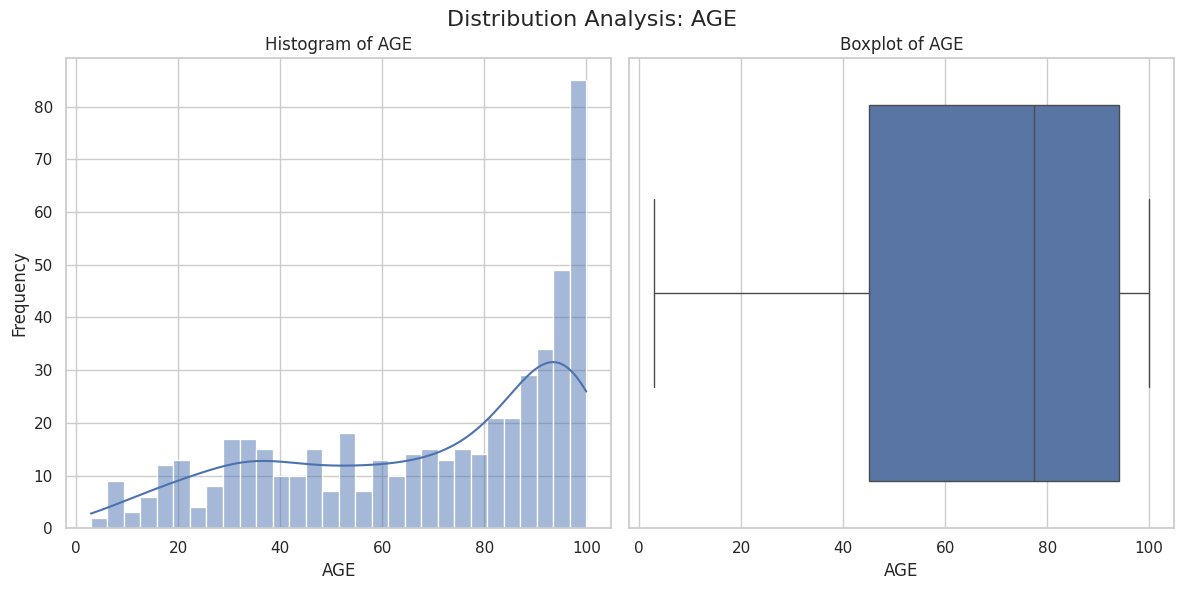

In [27]:
# Visualize the main variables used in the analysis
columns_to_visualize = ['MEDV', 'LSTAT', 'AGE']
visualize_distribution(boston_df, columns_to_visualize)

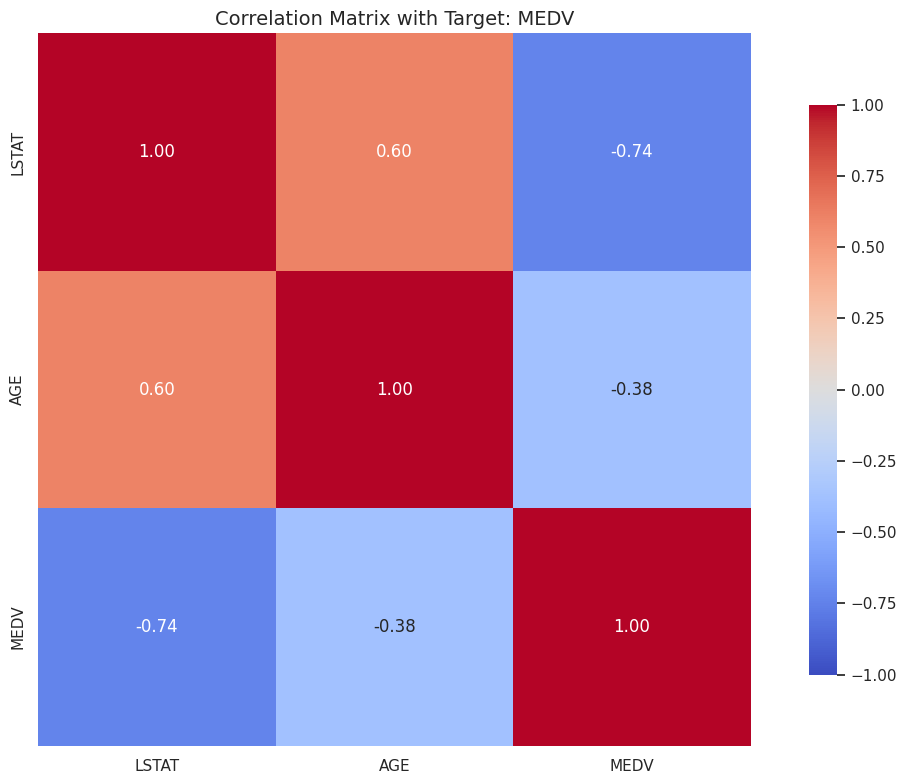

In [29]:
# Plot correlation heatmap for selected features with the target variable
features_of_interest = ['LSTAT', 'AGE']
plot_correlation_with_target(boston_df, features_of_interest, 'MEDV')

## Fit a multiple linear regression model

In [32]:
# Fit a Multiple Linear Regression Model
print("Fitting model: MEDV ~ LSTAT + AGE")
print("===================================")

# Define the model using the R-style formula syntax from statsmodels
# 'MEDV' is the dependent variable, 'LSTAT' and 'AGE' are the independent variables
# The '+' sign indicates they are both included in the model
formula = 'MEDV ~ LSTAT + AGE'

# Fit the Ordinary Least Squares (OLS) model, smf.ols takes the formula and the DataFrame as input
model = smf.ols(formula=formula, data=boston_df).fit()
print("\nModel fitted successfully.")

Fitting model: MEDV ~ LSTAT + AGE

Model fitted successfully.


In [36]:
# Show the coefficients as a Series object
print("Coeficientes:")
print("===================================")
print(f"\n{model.params}")

Coeficientes:

Intercept    33.222761
LSTAT        -1.032069
AGE           0.034544
dtype: float64


In [38]:
# Display Model Results
print("Model Summary")
print("===================================")
# Summary of detailed statistical overview of the fitted model
print(f"\n{model.summary()}")

Model Summary

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           2.98e-88
Time:                        01:29:22   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     

In [43]:
# Extract and print key results for clarity
print("\nR-squared and Adjusted R-squared:")
print("===================================")
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adj. R-squared: {model.rsquared_adj:.4f}")

print("\nF-statistic and p-value:")
print("===================================")
print(f"F-statistic: {model.fvalue:.4f}")
print(f"p-value: {model.f_pvalue:.4f}")


R-squared and Adjusted R-squared:
R-squared: 0.5513
Adj. R-squared: 0.5495

F-statistic and p-value:
F-statistic: 308.9693
p-value: 0.0000


In [44]:
# Model results analysis
print("Key Interpretation Points")
print("===================================")

# Coefficients interpretation
print("\nBasic Interpretation of Coefficients:")
print(f"- Intercept ({model.params['Intercept']:.3f}): The predicted MEDV when both LSTAT and AGE are zero (often not directly interpretable if zero is outside the data range).")
print(f"- LSTAT ({model.params['LSTAT']:.3f}): For a one-unit increase in LSTAT (percentage of lower-status population), the predicted MEDV decreases by approximately {-model.params['LSTAT']:.3f} thousands of dollars, holding AGE constant.")
print(f"- AGE ({model.params['AGE']:.3f}): For a one-unit increase in AGE (proportion of old units), the predicted MEDV increases by approximately {model.params['AGE']:.3f} thousands of dollars, holding LSTAT constant.")

# Statical significance of predictors
print("\nStatistical Significance of Predictors [P-values (P>|t|)]:")
print("- Both LSTAT and AGE have very small p-values (typically shown as 0.000), indicating they are statistically significant predictors of MEDV in this model (at conventional alpha levels like 0.05).")

# Global model significance
print(f"\nGlobal model significance:")
print(f"F-statistic: {model.fvalue:.4f}, p-value: {model.f_pvalue:.4f}")
print(f"The model is {'statistically significant' if model.f_pvalue < 0.05 else 'not statistically significant'} (α=0.05)")

Key Interpretation Points

Basic Interpretation of Coefficients:
- Intercept (33.223): The predicted MEDV when both LSTAT and AGE are zero (often not directly interpretable if zero is outside the data range).
- LSTAT (-1.032): For a one-unit increase in LSTAT (percentage of lower-status population), the predicted MEDV decreases by approximately 1.032 thousands of dollars, holding AGE constant.
- AGE (0.035): For a one-unit increase in AGE (proportion of old units), the predicted MEDV increases by approximately 0.035 thousands of dollars, holding LSTAT constant.

Statistical Significance of Predictors [P-values (P>|t|)]:
- Both LSTAT and AGE have very small p-values (typically shown as 0.000), indicating they are statistically significant predictors of MEDV in this model (at conventional alpha levels like 0.05).

Global model significance:
F-statistic: 308.9693, p-value: 0.0000
The model is statistically significant (α=0.05)


95% Confidence Intervals for Model Coefficients:
           Coefficient  Lower Bound (2.5%)  Upper Bound (97.5%)
Intercept    33.222761           31.786872            34.658650
LSTAT        -1.032069           -1.126748            -0.937389
AGE           0.034544            0.010525             0.058564


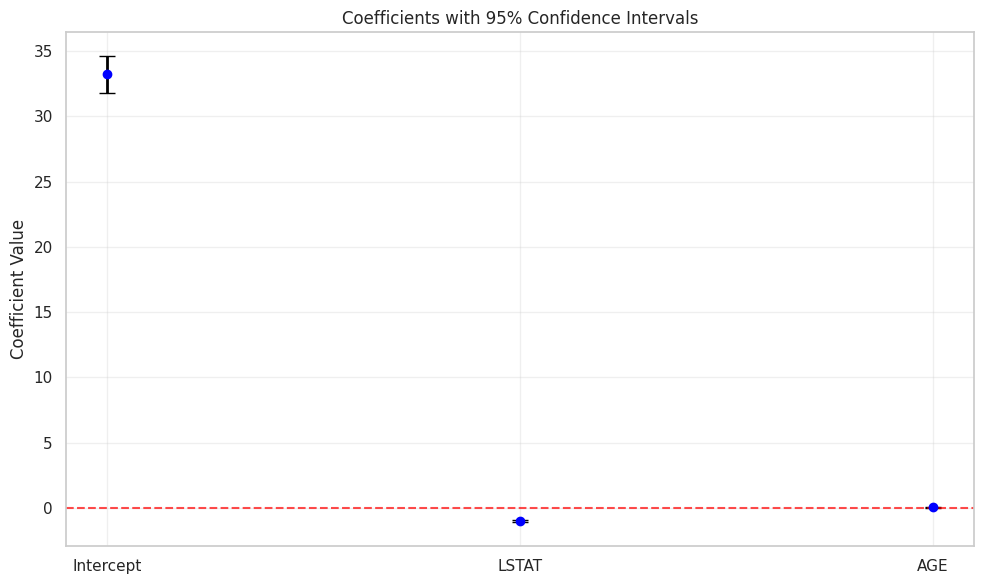

In [45]:
# Compute the 95% confidence intervals for the model coefficients (Calculate and display 95% confidence 
# intervals for model coefficients)
conf_int = model.conf_int(alpha=0.05)  # 95% confidence intervals

# Format the confidence intervals with the coefficients
conf_int_df = pd.DataFrame({
    'Coefficient': model.params,
    'Lower Bound (2.5%)': conf_int[0],
    'Upper Bound (97.5%)': conf_int[1]
})

print("95% Confidence Intervals for Model Coefficients:")
print("===================================================")
print(conf_int_df)

# Visualize the confidence intervals
plt.figure(figsize=(10, 6))
coef_names = model.params.index.tolist()
coef_values = model.params.values
ci_lower = conf_int[0].values
ci_upper = conf_int[1].values
errors = [coef_values - ci_lower, ci_upper - coef_values]

plt.errorbar(x=range(len(coef_names)), y=coef_values, yerr=errors, fmt='o', color='blue', 
                ecolor='black', elinewidth=2, capsize=6)

plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)  # Reference line at y=0
plt.xticks(range(len(coef_names)), coef_names)
plt.title('Coefficients with 95% Confidence Intervals')
plt.ylabel('Coefficient Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [46]:
# Interpretation of the confidence intervals
print("Interpretation of 95% Confidence Intervals")
print("===================================================")
print("- The 95% confidence interval represents the range within which we are 95% confident that the true parameter value lies.")
print("- If an interval does not include zero, the corresponding variable is statistically significant at the 5% level.")

for var in coef_names:
    lower = conf_int.loc[var, 0]
    upper = conf_int.loc[var, 1]
    is_significant = (lower > 0 and upper > 0) or (lower < 0 and upper < 0)
    
    print(f"\n• {var}: [{lower:.4f}, {upper:.4f}]")
    if var == 'Intercept':
        print(f"  - Interpretation: If both LSTAT and AGE were zero, we are 95% confident that the median home value would be between ${lower*1000:.0f} and ${upper*1000:.0f}.")
    elif is_significant:
        direction = "positive" if lower > 0 else "negative"
        print(f"  - Significant {direction} effect: Does not contain zero.")
        print(f"  - For each one-unit increase in {var}, we are 95% confident that the median home value changes by between ${lower*1000:.0f} and ${upper*1000:.0f}, holding other variables constant.")
    else:
        print(f"  - Not statistically significant: Contains zero.")

Interpretation of 95% Confidence Intervals
- The 95% confidence interval represents the range within which we are 95% confident that the true parameter value lies.
- If an interval does not include zero, the corresponding variable is statistically significant at the 5% level.

• Intercept: [31.7869, 34.6586]
  - Interpretation: If both LSTAT and AGE were zero, we are 95% confident that the median home value would be between $31787 and $34659.

• LSTAT: [-1.1267, -0.9374]
  - Significant negative effect: Does not contain zero.
  - For each one-unit increase in LSTAT, we are 95% confident that the median home value changes by between $-1127 and $-937, holding other variables constant.

• AGE: [0.0105, 0.0586]
  - Significant positive effect: Does not contain zero.
  - For each one-unit increase in AGE, we are 95% confident that the median home value changes by between $11 and $59, holding other variables constant.


## A brief Interpretation of the Regression Model (MEDV ~ LSTAT + AGE)

This model attempts to predict the median value of homes (`MEDV`) using two factors:
1. `LSTAT`: Percentage of population considered of lower socioeconomic status.
2. `AGE`: Proportion of old houses (built before 1940).

---

### 1. Interpretation of Coefficients (How do variables affect price?)

* **`Intercept` (Base Value, approx. 33.22):** This is the starting point for price (in thousands of dollars) if both `LSTAT` and `AGE` were zero. It doesn't always have a direct practical interpretation.
* **`LSTAT` (Coefficient approx. -1.03):**
    * **Negative Sign (-)**: More `LSTAT` implies **less** housing value (`MEDV`).
    * **Impact**: For each percentage point increase in `LSTAT`, the housing price tends to **decrease by about $1,030**, holding `AGE` constant. It's an important factor with negative impact.
* **`AGE` (Coefficient approx. 0.03):**
    * **Positive Sign (+)**: More old houses (`AGE`) implies **slightly more** housing value (`MEDV`), *when we control for `LSTAT`*.
    * **Impact**: For each percentage point increase in `AGE`, the housing price tends to **increase by about $30**, holding `LSTAT` constant. Its effect is positive but much smaller than that of `LSTAT`.

---

### 2. Statistical Significance (Are these factors important?)

We look at the `P>|t|` column in the model summary. If the value is **less than 0.05**, we consider the factor to be **statistically significant** (its effect is probably not due to mere chance).

* **`LSTAT`**: Its p-value is very close to 0.000 (< 0.05). **Yes, it is significant.**
* **`AGE`**: Its p-value is very close to 0.000 (< 0.05). **Yes, it is significant.**

**Conclusion**: Both `LSTAT` and `AGE` are relevant predictors of housing value in this model.

---

### 3. 95% Confidence Intervals (How certain are we about the effect?)

These intervals (columns `[0.025` and `0.975]`) give us a probable range for the *real* value of the coefficient in the population. If the interval **does not cross zero**, it reinforces that the factor is significant.

* **`LSTAT` (e.g.: [-1.13, -0.93]):**
    * The entire range is negative (does not include 0).
    * **Confirms the significant negative effect**. We are 95% confident that the real impact is between -$1130 and -$930 for each point of `LSTAT`.
* **`AGE` (e.g.: [0.01, 0.06]):**
    * The entire range is positive (does not include 0).
    * **Confirms the significant positive effect** (although small). We are 95% confident that the real impact is between +$10 and +$60 for each point of `AGE`.

**General Conclusion**: The model shows that `LSTAT` is a strong negative predictor of housing price, while `AGE` is a weaker positive predictor, but both are statistically significant.